In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc 
import joblib 
import seaborn as sns 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn

#### Initialise the MLP object used in the training script

In [11]:

class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, dropout=0.5):
        super(MLP, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.relu(self.fc1(X))
        X = self.dropout(X)
        X = self.sigmoid(self.fc2(X))

        return X


#### Load both SVM and MLP models in using joblib library

In [12]:
trained_svm_model = joblib.load('trained_svm.pkl')

trained_mlp_model = joblib.load('trained_mlp.pkl')

#### Testing the Support Vector Machine Model

##### Load SVM data

In [13]:
X_test_scaled = joblib.load('X_test_scaled.pkl')

y_test = joblib.load('y_test.pkl')

#### Test predictions and calculate accuracy

In [14]:
y_test_predictions = trained_svm_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_predictions)

print(f'Accuracy of the SVM test set - {test_accuracy}')

Accuracy of the SVM test set - 0.8534288638689866


#### Confusion Matrix and ROC Curve for SVM Test Results

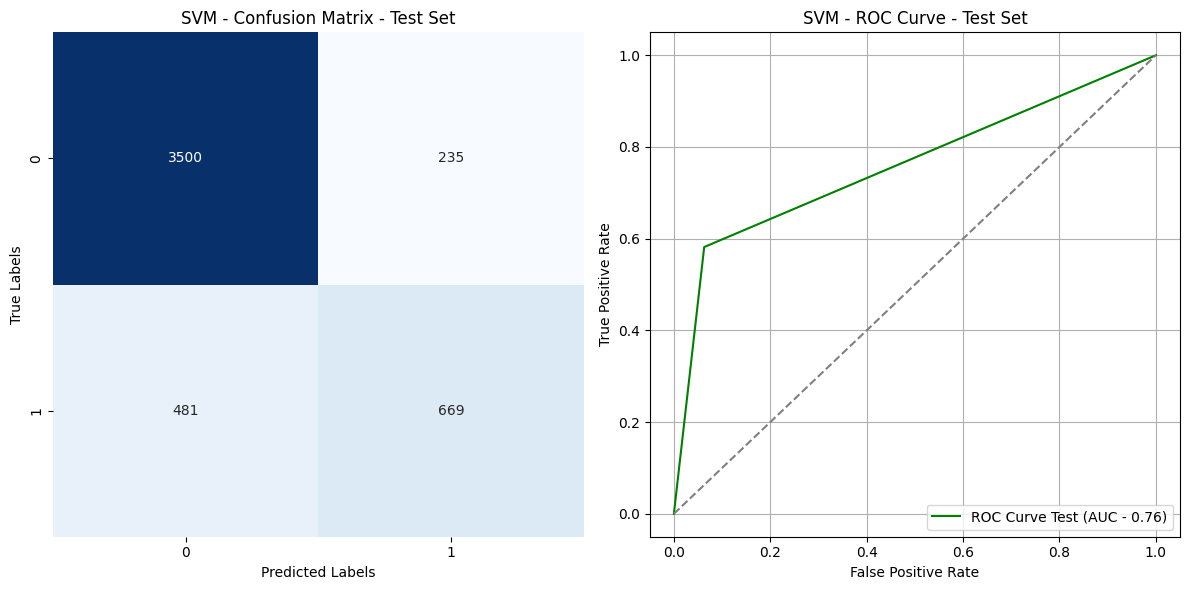

In [15]:
test_confusion_matrix = confusion_matrix(y_test, y_test_predictions)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predictions)

roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('SVM - Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='g', label = f'ROC Curve Test (AUC - {roc_auc_test:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Testing the Multi Layer Perceptron Model

##### Load MLP Data

In [16]:
X_test_tensor = torch.load('X_test_tensor.pt')
y_test_tensor = torch.load('y_test_tensor.pt')

#### Test predictions and calculate accuracy

In [17]:
y_test_prediction = trained_mlp_model.predict(X_test_tensor)

test_accuracy = accuracy_score(y_test_tensor, y_test_prediction)

print(f'Accuracy of the MLP test set - {test_accuracy}')

Accuracy of the MLP test set - 0.8468781985670419


#### Confusion Matrix and ROC Curve for MLP Test Results

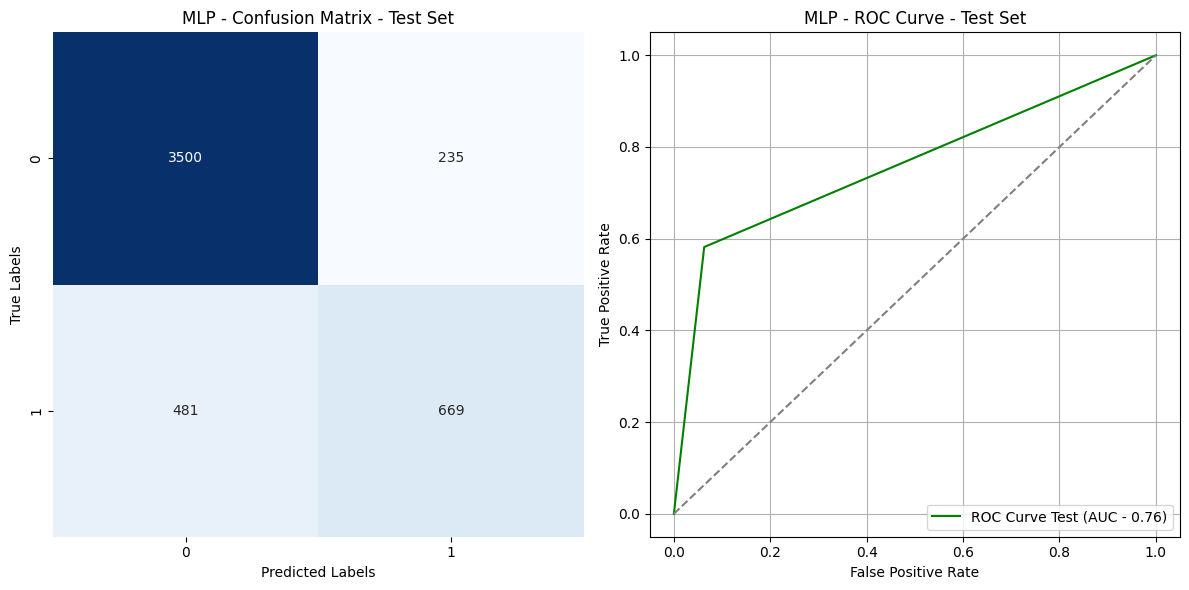

In [18]:
test_confusion_matrix = confusion_matrix(y_test_tensor, y_test_predictions)

fpr_test, tpr_test, _ = roc_curve(y_test_tensor, y_test_predictions)

roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('MLP - Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='g', label = f'ROC Curve Test (AUC - {roc_auc_test:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()
